# Plotting notebook


Notebook to plot timing results and study the performance of the code.

by Marco Tazzari.

In [1]:
import os
from glob import glob
import numpy as np

In [2]:
try:
    import matplotlib as mpl
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print("matplotlib not found: I will now install it!")
    !pip install matplotlib
finally:
    import matplotlib as mpl
    import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# % mpl
mpl.rcParams['figure.figsize'] = (6, 6)
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['xtick.major.pad'] = 8


## Read timing logs

In [4]:
fnames = glob("timings/*.txt")

fnames = sorted(glob("timings/*.txt"))
data = {}
for fname in fnames:
    simulator_id = os.path.splitext(fname)[0][-1]
    data[simulator_id] = np.loadtxt(fname)

# extrapolate timing for `python` (id=0) for N=1e7
# (just for the sake of speed in returning the test; the timing takes 30 mins)
d = data["0"].copy()
new_entry = d[-1].copy()
new_entry[6] = 1e7
new_entry[8] = 0.1*0.001*1e7  # roughly linear extrapolation
data["0"] = np.concatenate((d, new_entry[None, :]))


In [5]:
# descriptions of simulators
desc = {
    '0': 'python',
    '1': 'jit',
    '2': 'jit-parallel',
    '3': 'jit-noloops',
    '4': 'python-noloops',
    '5': 'jit-parallel-fastmath',
}

## Plot the timing and convergence results

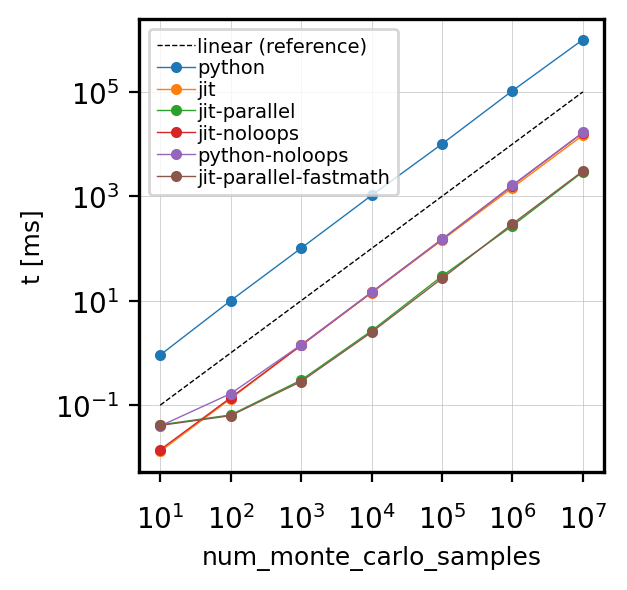

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200, facecolor='w')

s_to_ms = 1e3  # factor to convert from seconds (measured) to ms (plotted)

ax.plot(np.logspace(1, 7), 0.01*np.logspace(1, 7), 'k--',
       lw=0.5,
       label='linear (reference)')

for simulator_id, data_ in data.items():
    ax.plot(data_[:, 6], data_[:, 8]*s_to_ms, '.-', 
            lw=0.5,
            label=desc[simulator_id])

ax.grid(lw=0.2, which="both", axis='both')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks(data["0"][:, 6])

ax.set_xlabel("num_monte_carlo_samples", fontsize=9)
ax.set_ylabel("t [ms]", fontsize=9)

ax.legend(fontsize=7, labelspacing=0.15, handletextpad=0.1, frameon=True)

fig.savefig('execution_time_vs_num_monte_carlo_samples.png', bbox_inches='tight')

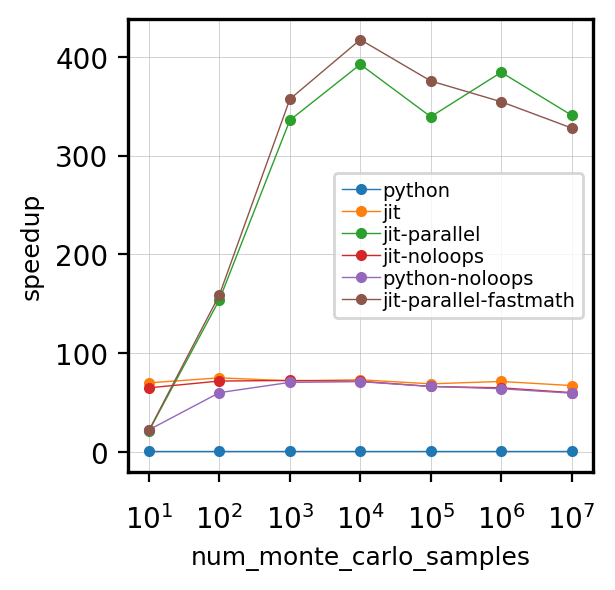

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200, facecolor='w')

# baseline: `python` id=0
baseline = data["0"][:, 8]

for simulator_id, data_ in data.items():
    ax.plot(data_[:, 6], baseline/data_[:, 8], '.-', 
            lw=0.5,
            label=desc[simulator_id])

ax.grid(lw=0.2, which="both", axis='both')

ax.set_xscale('log')

ax.set_xticks(data["0"][:, 6])

ax.set_xlabel("num_monte_carlo_samples", fontsize=9)
ax.set_ylabel("speedup", fontsize=9)

ax.legend(fontsize=7, labelspacing=0.15, handletextpad=0.1, frameon=True)

fig.savefig('speedup_vs_num_monte_carlo_samples.png', bbox_inches='tight')

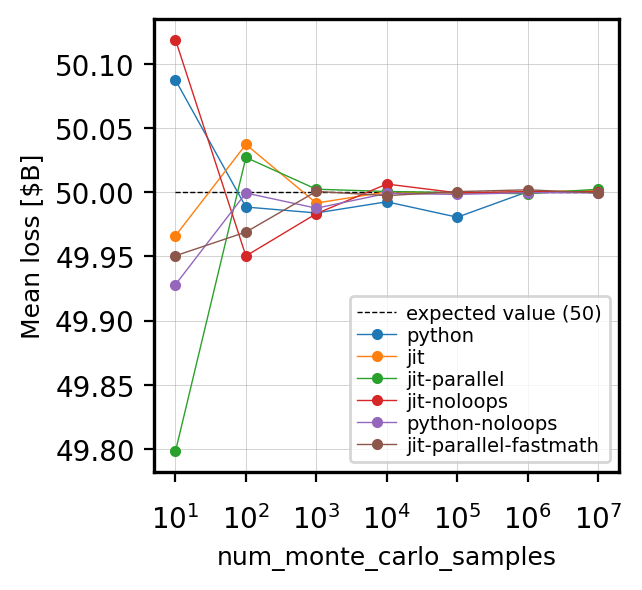

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=200, facecolor='w')

ax.plot(np.logspace(1, 7), 50.*np.ones(50), 'k--',
       lw=0.5,
       label='expected value (50)')

for simulator_id, data_ in data.items():
    ax.plot(data_[:, 6], data_[:, 9], '.-', 
            lw=0.5,
            label=desc[simulator_id])

ax.grid(lw=0.2, which="both", axis='both')

ax.set_xscale('log')

ax.set_xticks(data["0"][:, 6])

ax.set_xlabel("num_monte_carlo_samples", fontsize=9)
ax.set_ylabel("Mean loss [$B]", fontsize=9)

ax.legend(fontsize=7, labelspacing=0.15, handletextpad=0.5, frameon=True, loc='lower right')

fig.savefig('mean_loss_vs_num_monte_carlo_samples.png', bbox_inches='tight')